# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')

#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [6]:
casaMasCara = ds.loc[ds['price'].idxmax()]

print(f"La casa más cara es: {casaMasCara['realEstate_name']}")
print(f"Dirección: {casaMasCara['address']}")
print(f"Precio: {casaMasCara['price']}")

La casa más cara es: engel volkers torrelodones
Dirección: El Escorial
Precio: 8500000


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [7]:
casaMasBarata = ds.loc[ds['price'].idxmin()]

print(f"La casa más cara es: {casaMasBarata['realEstate_name']}")
print(f"Dirección: {casaMasBarata['address']}")
print(f"Precio: {casaMasBarata['price']}")

La casa más cara es: esalje
Dirección: Parla
Precio: 0


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [8]:
casaMasGrande = ds.loc[ds['surface'].idxmax()]

casaMasPequena = ds.loc[ds['surface'].idxmin()]

print(f"La casa más grande es: {casaMasGrande['realEstate_name']}")
print(f"Dirección: {casaMasGrande['address']}")
print(f"Superficie: {casaMasGrande['surface']}")

print(f"La casa más pequenha es: {casaMasPequena['realEstate_name']}")
print(f"Dirección: {casaMasPequena['address']}")
print(f"Superficie: {casaMasPequena['surface']}")

La casa más grande es: habitarium inmobiliaria
Dirección: Sevilla la Nueva
Superficie: 249000.0
La casa más pequenha es: toledo21
Dirección: Calle Amparo,  Madrid Capital
Superficie: 15.0


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [9]:

poblaciones = ds['level5'].unique()

cantidadPoblaciones = len(poblaciones)

print(f"El dataset contiene {cantidadPoblaciones} poblaciones.")
print("Nombres de las poblaciones:")
print(", ".join(poblaciones))

El dataset contiene 168 poblaciones.
Nombres de las poblaciones:
Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Esc

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [10]:
nas = ds.isnull().values.any()


print(f"¿El dataset contiene NAs?: {nas}")

if nas:
        
    filasNas = ds[ds.isnull().any(axis=1)]
    print("\nFilas con valores NAs:")
    print(filasNas)

¿El dataset contiene NAs?: True

Filas con valores NAs:
       Unnamed: 0  id_realEstates  isNew                    realEstate_name  \
0               1       153771986  False            ferrari 57 inmobiliaria   
1               2       153867863  False  tecnocasa fuenlabrada ferrocarril   
2               3       153430440  False                 look find boadilla   
3               4       152776331  False  tecnocasa fuenlabrada ferrocarril   
4               5       153180188  False            ferrari 57 inmobiliaria   
...           ...             ...    ...                                ...   
15330       15331       153901377  False                infocasa consulting   
15331       15332       150394373  False                inmobiliaria pulpon   
15332       15333       153901397  False             tecnocasa torrelodones   
15333       15334       152607440  False                inmobiliaria pulpon   
15334       15335       153901356  False                infocasa consulting

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [11]:
dfSinNas = ds.dropna()

print("\nComparación del número de filas:")
print(f"Con NAs: {len(ds)} filas")
print(f"Sin NAs: {len(dfSinNas)} filas")

dfSinNas.head()
ds.head()


Comparación del número de filas:
Con NAs: 15335 filas
Sin NAs: 0 filas


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [12]:
arroyoMolinos = ds.where((ds['level5'] == "Arroyomolinos (Madrid)")) 

media = arroyoMolinos['price'].mean()
print(media)




294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


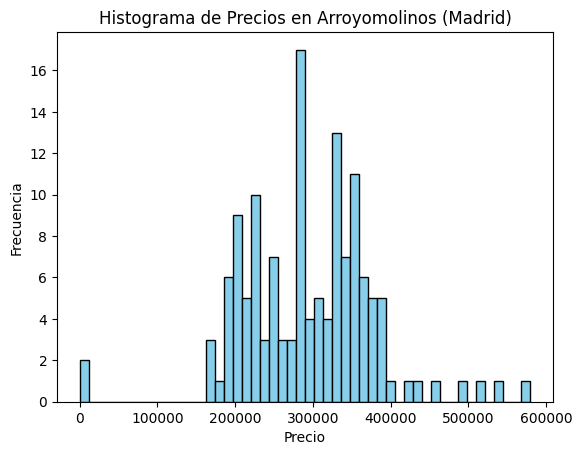

In [13]:
arroyoMolinos = ds.where((ds['level5'] == "Arroyomolinos (Madrid)"))

precios = arroyoMolinos['price']

plt.hist(precios, bins=50, color='skyblue', edgecolor='black')

plt.title("Histograma de Precios en Arroyomolinos (Madrid)")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.show()

**La media de precios esta alrededor de 30.000,00**
**La mayoria de casas ronda entre los 20k y 40k**

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [14]:
valdemorillo = ds.where((ds['level5'] == "Valdemorillo")) 
galapagar = ds.where((ds['level5'] == "Galapagar")) 

mediaValdemorillo = valdemorillo['price'].mean()
mediaGalapar = galapagar['price'].mean()

print(mediaValdemorillo)
print(mediaGalapar)

363860.2931034483
360063.20238095237


**El precio promedio de las casas en ambas regiones es casi el mismo**

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [15]:
ds['pps'] = ds['price'] / ds['surface']

promedioValdemorillo = ds[ds['level5'] == "Valdemorillo"]['pps'].mean()
promedioGalapar = ds[ds['level5'] == "Galapagar"]['pps'].mean()

print(promedioValdemorillo)
print(promedioGalapar)

1317.9502109024986
1606.3240303094024


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

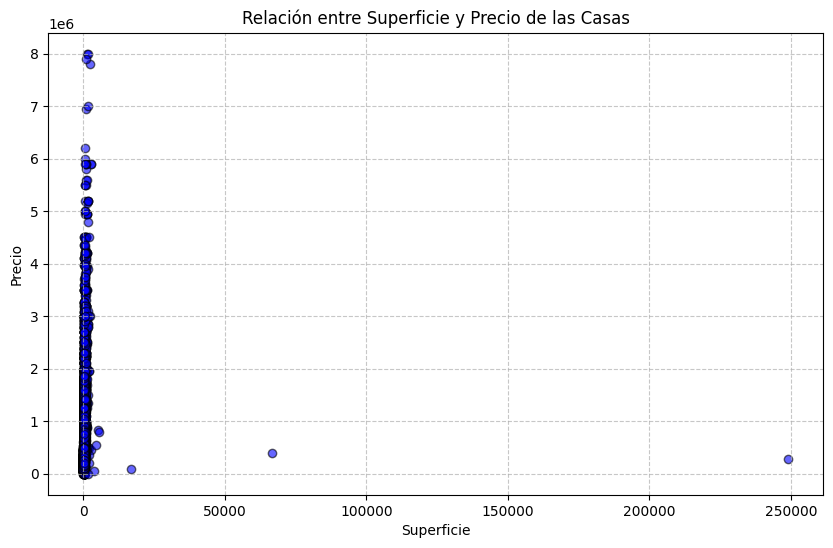

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(ds['surface'], ds['price'], alpha=0.6, color='blue', edgecolor='black')

plt.title("Relación entre Superficie y Precio de las Casas")
plt.xlabel("Superficie")
plt.ylabel("Precio")

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

**El precio de las casas esta directamente realcionado con su superficie o area**

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [17]:
agencias = ds['id_realEstates'].unique()

cantidadAgencias = len(agencias)

print(f"El dataset contiene {cantidadPoblaciones} agencias.")


El dataset contiene 168 agencias.


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [28]:
totalCasas = ds['level5'].value_counts()

masCasas = totalCasas.idxmax()
cantidadCasas = totalCasas.max()

print(f"La población con la mayor cantidad de casas es: {masCasas}")
print(f"Número de casas: {cantidadCasas}")

La población con la mayor cantidad de casas es:  Madrid Capital
Número de casas: 6643


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [30]:
cinturonSur = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

subconjunto = ds[ds['level5'].isin(cinturonSur)]

print(subconjunto)

       Unnamed: 0  id_realEstates  isNew  \
1               2       153867863  False   
3               4       152776331  False   
85             86       153152077  False   
94             95       153995577  False   
109           110       153586414  False   
...           ...             ...    ...   
15275       15276       153903887  False   
15291       15292       151697757  False   
15305       15306       153902389  False   
15322       15323       153871864  False   
15325       15326       153901467  False   

                                 realEstate_name  phone_realEstate  \
1              tecnocasa fuenlabrada ferrocarril       916358736.0   
3              tecnocasa fuenlabrada ferrocarril       916358736.0   
85                       sinergical inmobiliaria               NaN   
94                               viviendas365com       911226014.0   
109              area uno asesores inmobiliarios       912664081.0   
...                                          ...   

#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

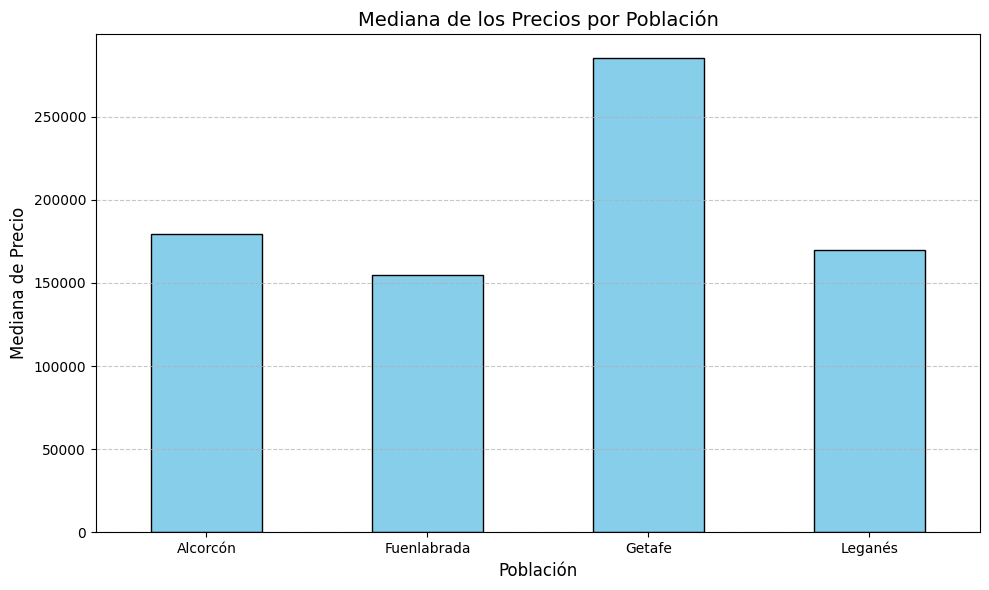

In [46]:
medianaPreciosSur = subconjunto.groupby('level5')['price'].median()

plt.figure(figsize=(10, 6))
medianaPreciosSur.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title("Mediana de los Precios por Población", fontsize=14)
plt.xlabel("Población", fontsize=12)
plt.ylabel("Mediana de Precio", fontsize=12)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [48]:
variables = ['price', 'rooms', 'surface', 'bathrooms']

medias = subconjunto[variables].mean()

varianzas = subconjunto[variables].var()

print("Media de las variables:")
print(medias)

print("\nVarianza de las variables:")
print(varianzas)

Media de las variables:
price        223094.480706
rooms             3.017738
surface         111.752224
bathrooms         1.633222
dtype: float64

Varianza de las variables:
price        1.492137e+10
rooms        7.188859e-01
surface      4.263052e+03
bathrooms    5.717969e-01
dtype: float64


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [52]:
masCaras = subconjunto.loc[subconjunto.groupby('level5')['price'].idxmax()]

print("Casas más caras por población:")
for i, row in masCaras.iterrows():
    print(f"Población: {row['level5']}")
    print(f"  Dirección: {row['address']}")
    print(f"  Precio: {row['price']}\n")

Casas más caras por población:
Población: Alcorcón
  Dirección: Alcorcón
  Precio: 950000

Población: Fuenlabrada
  Dirección: Calle de Paulo Freire, 5, Fuenlabrada
  Precio: 490000

Población: Getafe
  Dirección: Getafe
  Precio: 1050000

Población: Leganés
  Dirección: Avenida Reina Sofía, Leganés
  Precio: 650000



#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_57923/4034380886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto['normalizarPrecio'] = subconjunto.groupby('level5')['price'].transform(


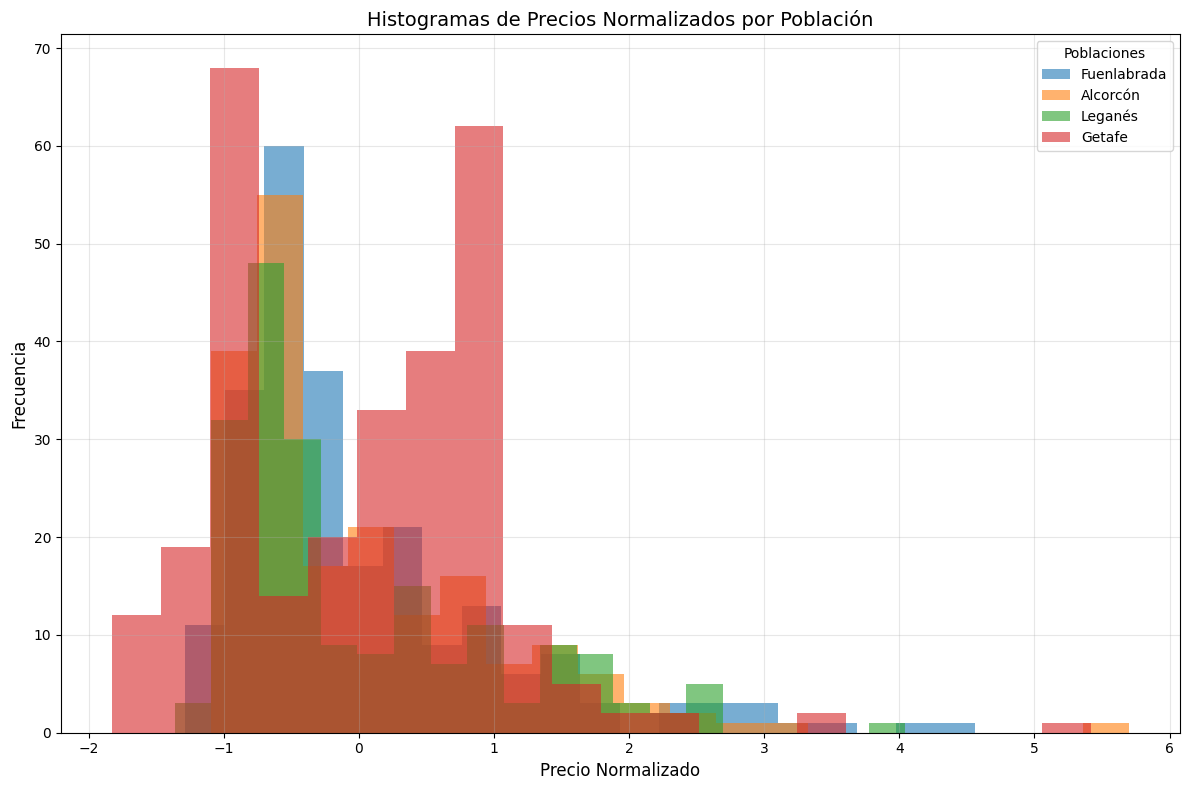

In [54]:
subconjunto['normalizarPrecio'] = subconjunto.groupby('level5')['price'].transform(
    lambda x: (x - x.mean()) / x.std()
)

poblaciones = subconjunto['level5'].unique()


plt.figure(figsize=(12, 8))

for poblacion in poblaciones:
    precios_normalizados = subconjunto[subconjunto['level5'] == poblacion]['normalizarPrecio']
    plt.hist(precios_normalizados, bins=20, alpha=0.6, label=poblacion)

plt.title("Histogramas de Precios Normalizados por Población", fontsize=14)
plt.xlabel("Precio Normalizado", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.legend(title="Poblaciones")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

**La mayoría de las poblaciones tienen precios normalizados concentrados alrededor de 0, lo que significa que la mayoría de los precios están cerca del promedio de cada población.**

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [59]:
subconjunto['pps'] = subconjunto['price'] / subconjunto['surface']

ppsGetafe = subconjunto[subconjunto['level5'] == 'Getafe']['pps']
mediaGetafe = ppsGetafe.mean()

ppsAlcorcon = subconjunto[subconjunto['level5'] == 'Alcorcón']['pps']
mediaAlcorcon = ppsAlcorcon.mean()

print("Precio por metro cuadrado (pps):")
print("Getafe:", mediaGetafe)
print("Alcorcón:", mediaAlcorcon)


Precio por metro cuadrado (pps):
Getafe: 2066.314949251463
Alcorcón: 2239.302480199618


/tmp/ipykernel_57923/703284399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subconjunto['pps'] = subconjunto['price'] / subconjunto['surface']


**El valor del mettro cuadrado en Getafe es menor**

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

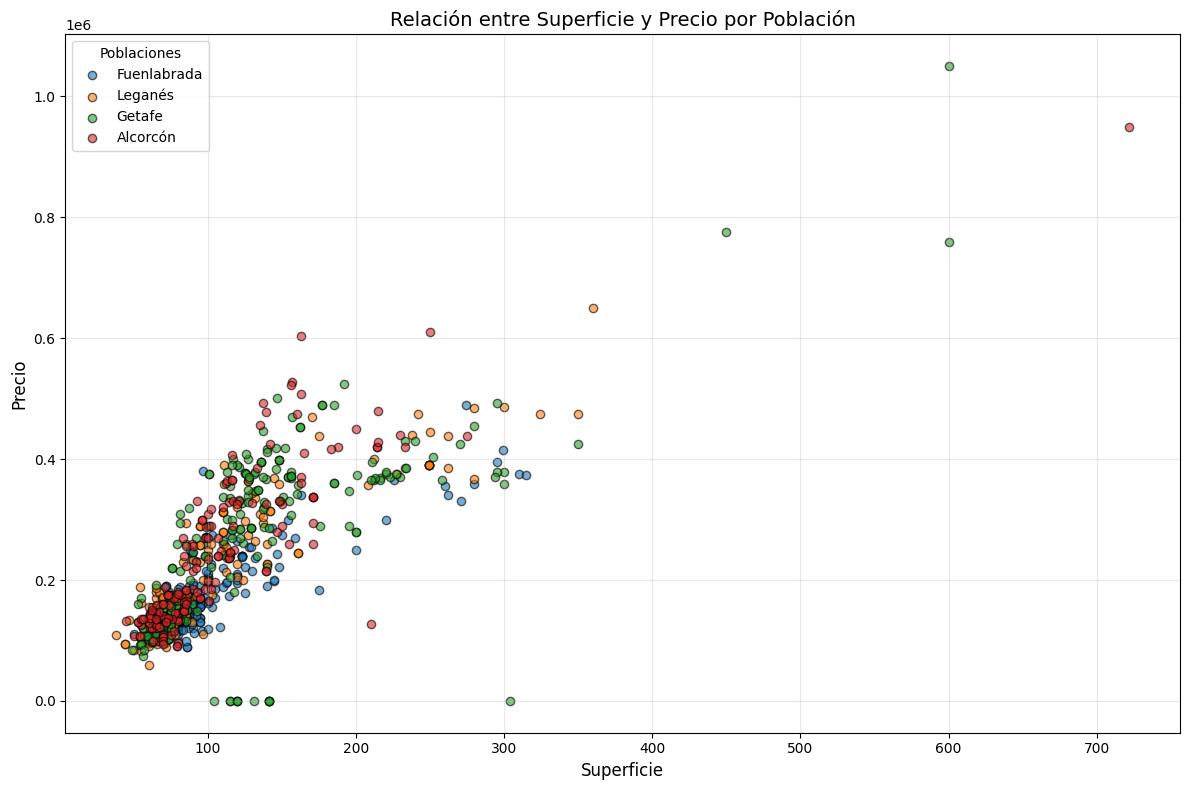

In [63]:
poblaciones = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

plt.figure(figsize=(12, 8))

for poblacion in poblaciones:
    
    datosPoblacion = subconjunto[subconjunto['level5'] == poblacion]
    
    
    plt.scatter(
        datosPoblacion['surface'], 
        datosPoblacion['price'], 
        label=poblacion, 
        alpha=0.6, 
        edgecolor='black'
    )

# Configurar el gráfico
plt.title("Relación entre Superficie y Precio por Población", fontsize=14)
plt.xlabel("Superficie", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.legend(title="Poblaciones")
plt.grid(alpha=0.3)


plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [94]:
from ipyleaflet import Map, Marker, basemaps

# Usar un basemap alternativo
map = Map(center=(60, -2.2), zoom=2, min_zoom=1, max_zoom=20, 
          basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[60, -2.2], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [ ]:
subconjunto['latitude'] = pd.to_numeric(subconjunto['latitude'], errors='coerce')
subconjunto['longitude'] = pd.to_numeric(subconjunto['longitude'], errors='coerce')
subconjunto = subconjunto.dropna(subset=['latitude', 'longitude'])

coordenadas = (
    subconjunto[['latitude', 'longitude', 'address', 'price']]
    .to_dict('records')
)

for punto in coordenadas:
    marcador = Marker(
        location=(punto['latitude'], punto['longitude']),
        title=f"{punto['address']} - {punto['price']}"
    )
    map.add_layer(marcador)

map


Map(bottom=746.0, center=[-11.867350911459308, 35.50781250000001], controls=(ZoomControl(options=['position', …